 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_path = Path("../Pandas-Homework/STOCKS/whale_returns.csv")
algo_returns_path = Path("../Pandas-Homework/STOCKS/algo_returns.csv")
sp500_history_path = Path("../Pandas-Homework/STOCKS/sp500_history.csv")

#READ IN DATA, DATE-TIME FORMAT.
whale_returns_csv = pd.read_csv(whale_returns_path)
whale_returns_csv["Date"]=pd.to_datetime(whale_returns_csv["Date"])

In [3]:
whale_returns_csv.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
whale_returns_csv.sort_values("Date",inplace=True)

In [5]:
whale_returns_csv.set_index("Date", inplace=True)
# Count nulls (Whale Returns)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls (Whale Returns)
whale_returns_csv.dropna(inplace=True)
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
whale_returns_csv.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
algo_returns_csv = pd.read_csv(algo_returns_path)
algo_returns_csv["Date"]=pd.to_datetime(algo_returns_csv["Date"])

In [9]:
algo_returns_csv.sort_values("Date",inplace=True)

In [10]:
algo_returns_csv.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [11]:
#SET DATE AS INDEX
algo_returns_csv.set_index("Date", inplace=True)

In [12]:
# Count nulls
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [13]:
# Drop nulls
algo_returns_csv.dropna(inplace=True)
algo_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [14]:
algo_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [15]:
sp500_history_csv = pd.read_csv(sp500_history_path)
sp500_history_csv["Date"]=pd.to_datetime(sp500_history_csv["Date"])

In [16]:
sp500_history_csv.head()

,Date,Close
0,2019-04-23,$2933.68
1,2019-04-22,$2907.97
2,2019-04-18,$2905.03
3,2019-04-17,$2900.45
4,2019-04-16,$2907.06


In [17]:
sp500_history_csv.set_index("Date", inplace=True)

In [18]:
sp500_history_csv.isnull().sum()

Close    0
dtype: int64

In [19]:
# Check Data Types
sp500_history_csv.dtypes

Close    object
dtype: object

In [20]:
# Fix Data Types
sp500_history_csv["Close"] = sp500_history_csv["Close"].str.replace('$','')
sp500_history_csv["Close"] = sp500_history_csv["Close"].astype('float')
sp500_history_csv.dtypes

Close    float64
dtype: object

In [21]:
sp500_history_csv.sort_values("Date",inplace=True)

In [22]:
sp500_history_csv.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [23]:
# Calculate Daily Returns
sp500_history_daily = (sp500_history_csv - sp500_history_csv.shift(1))/sp500_history_csv.shift(1)

In [24]:
# Drop nulls
sp500_history_daily.dropna(inplace=True)

In [25]:
# Rename Column
sp500_history_daily.rename(columns={"Close": "S&P500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [26]:
# Concatenate all DataFrames into a single DataFrame
returns_daily = pd.concat([sp500_history_daily,algo_returns_csv,whale_returns_csv], axis="columns", join="inner", sort=False)

In [27]:
returns_daily = returns_daily.fillna(0)

In [28]:
returns_daily = returns_daily.round(4)

In [29]:
# print(returns_daily.to_string())

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

In [30]:
# Drop out all the values in the dataset before the algorithm portfolios.
# The algos start on june 05, 2014. We need to find out which number in the index this is.
# returns_daily = returns_daily.loc['2014-06-05':]
returns_daily.describe()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000349,0.000663,0.000264,0.000175,-0.000213,-0.000083,0.000508
std,0.008555,0.007621,0.008341,0.007895,0.007024,0.010893,0.012919
min,-0.041000,-0.031000,-0.036900,-0.032700,-0.032100,-0.139800,-0.066500
25%,-0.002900,-0.003250,-0.003800,-0.003600,-0.004000,-0.004800,-0.005650
50%,0.000400,0.000100,0.000700,0.000500,0.000000,0.000300,0.000700
75%,0.004500,0.003900,0.005250,0.004300,0.003600,0.005250,0.007650
max,0.049600,0.050700,0.030800,0.043000,0.029300,0.080700,0.061300


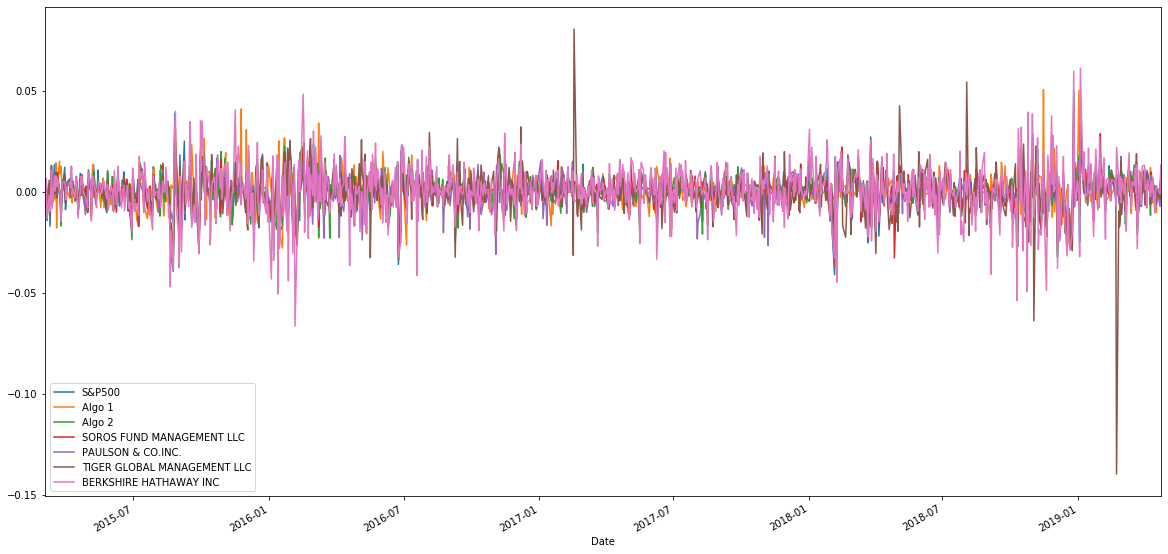

In [31]:
# Plot daily returns
returns_daily.plot(figsize=(20,10))
# [["Algo 1", "Algo 2", "S&P500"]]

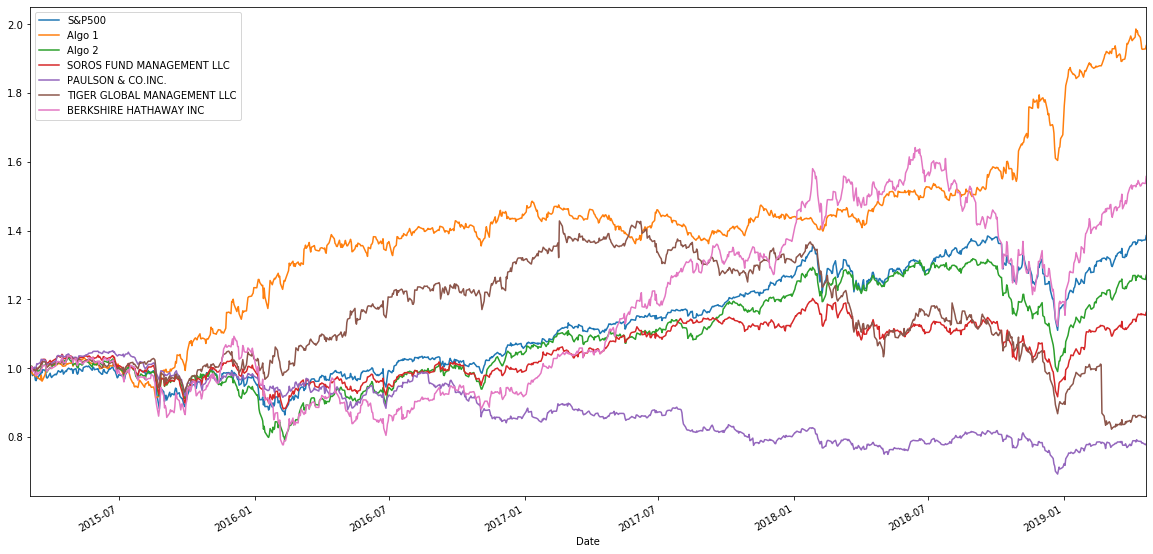

In [32]:
# Plot cumulative returns
cumulative_returns = (1 + returns_daily).cumprod()
cumulative_returns.plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

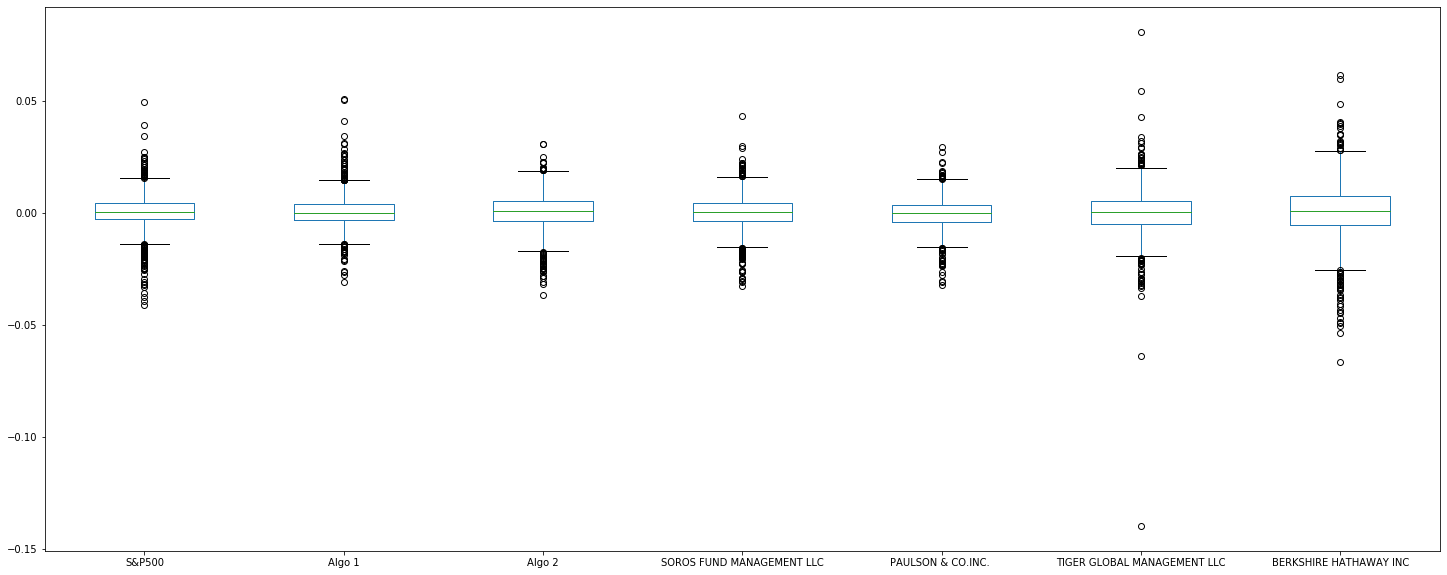

In [33]:
# Box plot to visually show risk
returns_daily.plot.box(figsize=(25,10))

In [34]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
returns_std = returns_daily.std()

In [35]:
# Determine which portfolios are riskier than the S&P 500
returns_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010893
S&P500                         0.008555
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007621
PAULSON & CO.INC.              0.007024
dtype: float64

In [36]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = returns_std * np.sqrt(252)
annualized_std.head()

S&P500                       0.135808
Algo 1                       0.120979
Algo 2                       0.132415
SOROS FUND MANAGEMENT LLC    0.125327
PAULSON & CO.INC.            0.111500
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calcualte the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

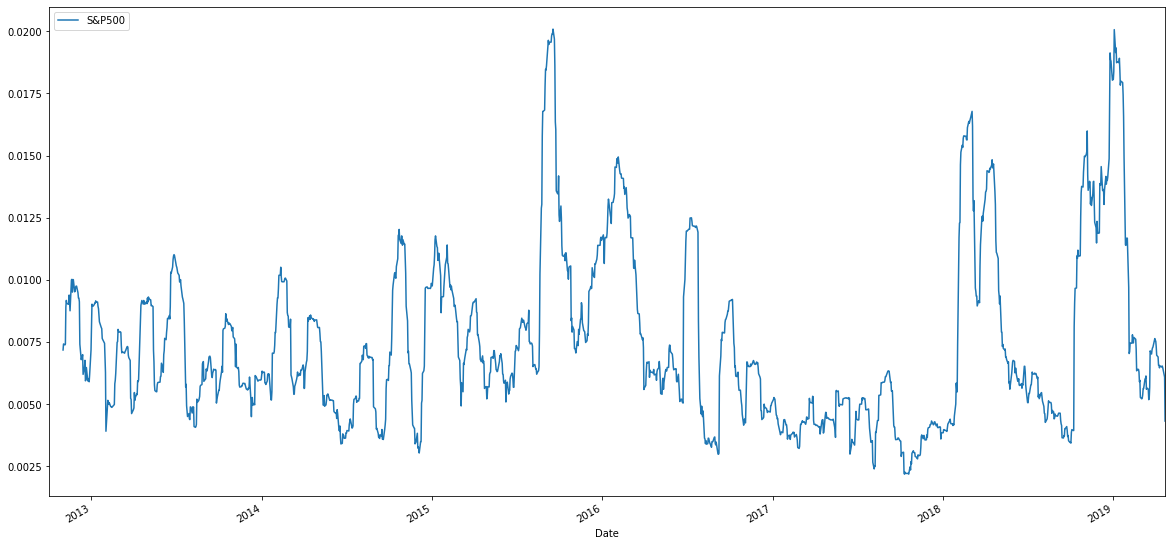

In [37]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_returns=sp500_history_daily.rolling(window=21).std().plot(figsize=(20,10))

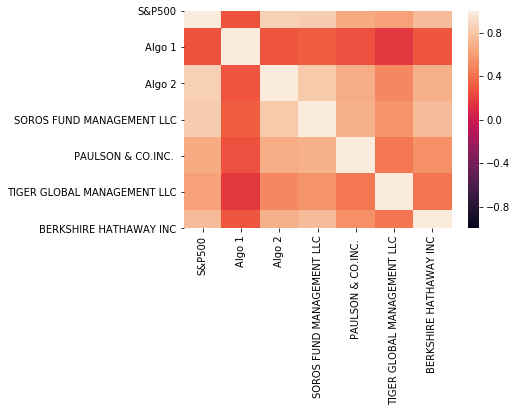

In [38]:
# Correlation
correlation = returns_daily.corr()

# Use the `heatmap` function from the Seaborn library to visualize correlations
sns.heatmap(correlation, vmin=-1, vmax=1)

In [39]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = returns_daily['Algo 1'].cov(returns_daily['S&P500'])
covariance

1.8232520578649735e-05

In [40]:
variance = returns_daily['S&P500'].var()
variance

7.318939197980133e-05

In [41]:
beta = covariance/variance
beta=round(beta, 4)
print(beta)

0.2491


### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [42]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [43]:
# Annualzied Sharpe Ratios
sharpe_ratios = (returns_daily.mean() * 252) / (returns_daily.std() * np.sqrt(252))
sharpe_ratios

S&P500                         0.647580
Algo 1                         1.381615
Algo 2                         0.502144
SOROS FUND MANAGEMENT LLC      0.352216
PAULSON & CO.INC.             -0.482355
TIGER GLOBAL MANAGEMENT LLC   -0.121275
BERKSHIRE HATHAWAY INC         0.624510
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

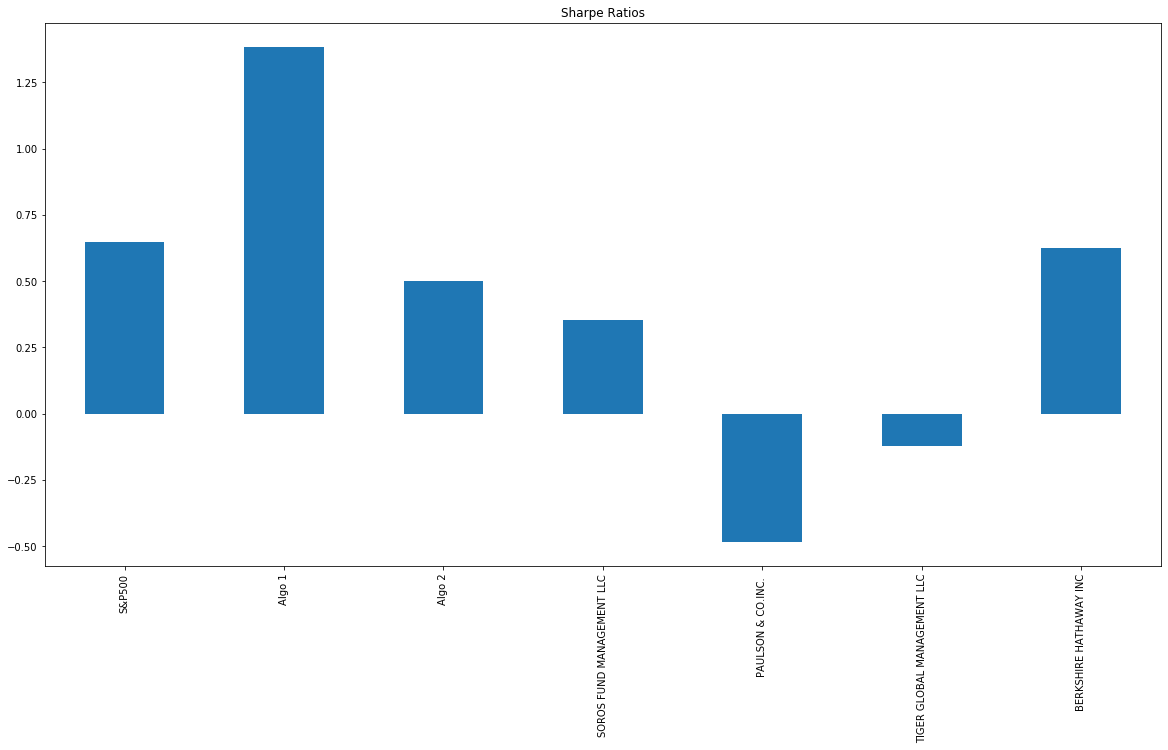

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title= "Sharpe Ratios",figsize=(20,10))

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [45]:
# Read the first stock, Rename column "Close" to "BAC_Close"
bac_close_path = Path("../Pandas-Homework/STOCKS/5yr-BAC.csv")
bac_close_csv = pd.read_csv(bac_close_path, parse_dates=True, infer_datetime_format=True)
bac_close_csv.head()

,Date,Close/Last,Volume,Open,High,Low
0,01/08/2020,$34.97,45336660,$34.57,$35.19,$34.55
1,01/07/2020,$34.62,34348580,$34.7,$34.92,$34.53
2,01/06/2020,$34.85,42233300,$34.41,$34.9,$34.37
3,01/03/2020,$34.9,50763660,$34.98,$35.15,$34.76
4,01/02/2020,$35.64,37643860,$35.35,$35.66,$35.29


In [46]:
# # bac_close_csv["Date"]=pd.to_datetime(bac_close_csv["Date"])
bac_close_csv.rename(columns={" Close/Last": "BAC_Close"}, inplace=True)
bac_close_csv = bac_close_csv.drop(columns=[" Volume", " Open", " High", " Low"])

In [47]:
# # Read the second stock, rename column "Close" to "RTN_Close", drop column "Date"
rtn_close_path = Path("../Pandas-Homework/STOCKS/5yr-RTN.csv")
rtn_close_csv = pd.read_csv(rtn_close_path)
rtn_close_csv.rename(columns={" Close/Last": "RTN_Close"}, inplace=True)
rtn_close_csv = rtn_close_csv.drop(columns=[" Open", " High", " Low", " Volume", "Date"])

In [48]:
# # Read the third stock, rename column "Close" to "BA_Close", drop column "Date"
ba_close_path = Path("../Pandas-Homework/STOCKS/5yr-BA.csv")
ba_close_csv = pd.read_csv(ba_close_path)
ba_close_csv.rename(columns={" Close/Last": "BA_Close"}, inplace=True)
ba_close_csv = ba_close_csv.drop(columns=[" Open", " High", " Low", " Volume", "Date"])

In [49]:
# # Concatenate all stocks into a single DataFrame
close_prices = pd.concat([ba_close_csv,rtn_close_csv,bac_close_csv], axis="columns", join="inner", sort=False)

In [50]:
# # Reset the index
close_prices.set_index("Date", inplace=True)
close_prices.head()

,BA_Close,RTN_Close,BAC_Close
Date,,,
01/08/2020,$331.37,$227.4,$34.97
01/07/2020,$337.28,$226.54,$34.62
01/06/2020,$333.74,$227.53,$34.85
01/03/2020,$332.76,$227.81,$34.9
01/02/2020,$333.32,$224.48,$35.64


In [51]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
## MY TICKERS ARE ALREADY THE COLUMNS. AIN'T FINNA PIVOT NADA.
## BUT I WILL FIX CLOSE TO RETURNS
close_prices["BA_Close"] = close_prices["BA_Close"].str.replace('$','')
close_prices["RTN_Close"] = close_prices["RTN_Close"].str.replace('$','')
close_prices["BAC_Close"] = close_prices["BAC_Close"].str.replace('$','')
close_prices["BA_Close"] = close_prices["BA_Close"].astype('float')
close_prices["RTN_Close"] = close_prices["RTN_Close"].astype('float')
close_prices["BAC_Close"] = close_prices["BAC_Close"].astype('float')

In [52]:
close_prices.head()

,BA_Close,RTN_Close,BAC_Close
Date,,,
01/08/2020,331.37,227.40,34.97
01/07/2020,337.28,226.54,34.62
01/06/2020,333.74,227.53,34.85
01/03/2020,332.76,227.81,34.90
01/02/2020,333.32,224.48,35.64


In [53]:
# Drop Nulls
close_prices.isnull().sum()

BA_Close     0
RTN_Close    0
BAC_Close    0
dtype: int64

In [54]:
returns = close_prices.pct_change()
returns.head()

,BA_Close,RTN_Close,BAC_Close
Date,,,
01/08/2020,NaN,NaN,NaN
01/07/2020,0.017835,-0.003782,-0.010009
01/06/2020,-0.010496,0.004370,0.006644
01/03/2020,-0.002936,0.001231,0.001435
01/02/2020,0.001683,-0.014617,0.021203


In [70]:
returns.index = pd.to_datetime(returns.index)
returns.head()

,BA_Close,RTN_Close,BAC_Close
Date,,,
2020-01-08,NaN,NaN,NaN
2020-01-07,0.017835,-0.003782,-0.010009
2020-01-06,-0.010496,0.004370,0.006644
2020-01-03,-0.002936,0.001231,0.001435
2020-01-02,0.001683,-0.014617,0.021203


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [71]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
portfolio_returns=returns.dot(weights)
portfolio_returns.head()

Date
2020-01-08         NaN
2020-01-07    0.001348
2020-01-06    0.000173
2020-01-03   -0.000090
2020-01-02    0.002756
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [72]:
# YOUR CODE HERE

In [73]:
# Only compare dates where the new, custom portfolio has dates
all_returns = pd.concat([returns_daily, portfolio_returns],axis="columns", join="inner", sort=False)
all_returns.head()

,S&P500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,0
Date,,,,,,,,
2015-03-03,-0.0045,-0.0019,-0.0009,-0.0013,-0.0050,-0.0005,-0.0066,0.011277
2015-03-04,-0.0044,-0.0086,0.0024,0.0022,0.0032,-0.0025,0.0042,-0.004216
2015-03-05,0.0012,-0.0010,0.0043,0.0040,0.0041,0.0024,0.0067,0.003962
2015-03-06,-0.0142,-0.0050,-0.0115,-0.0079,-0.0036,-0.0085,-0.0131,-0.007657
2015-03-09,0.0039,-0.0054,0.0013,0.0006,0.0042,0.0058,-0.0017,0.019280


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [58]:
# Risk
# YOUR CODE HERE

In [59]:
# Rolling
# YOUR CODE HERE

In [60]:
# Beta
# YOUR CODE HERE

In [61]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [62]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [63]:
# YOUR CODE HERE